In [0]:
!pip install sastrawi

In [0]:
#import libarary
import pandas as pd
import numpy as np
import html 
import re
import warnings 
import nltk
from nltk.tokenize import TweetTokenizer #for tokenize text 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#Step3 and Step4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #for vectorize text into sparse matrix 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from io import StringIO
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
#nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
tweets = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TAq/karhutla_label.csv',encoding="utf-8")
data1 = tweets[['tweet','sentimen']]
data1.head()

,tweet,sentimen
0,@VIVAcoid @VIVAcoid & bahas juga dunk kasus h...,negatif
1,Pak @jokowi Dengan segala hormat. Menimbang ko...,negatif
2,"SANDIAGA bilang lagi PENGANGGURAN, diangkat ja...",negatif
3,yang di ibukota jangan banyak ngeluh panas mac...,positif
4,VIDEO: Perdana Menteri India Pungut Sampah di ...,netral


In [0]:
sentiment  = data1['sentimen'].value_counts()
sentiment


netral     14395
negatif     8154
positif     3929
Name: sentimen, dtype: int64

In [0]:
#untuk mengecek data ada yang kosong atau tidak
nanvalue = data1['tweet'].isnull().sum()
nanvalue 

0

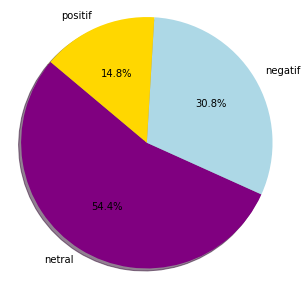

In [0]:
#(menampilkan jumlah data dlm grafik)
plt.figure(figsize=(5,5))
labels = 'netral', 'negatif','positif'
sizes = sentiment
colors = ['purple', 'lightblue','gold']
explode = (0,0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [0]:
group = data1.groupby('sentimen')
group.head()


,tweet,sentimen
0,@VIVAcoid @VIVAcoid & bahas juga dunk kasus h...,negatif
1,Pak @jokowi Dengan segala hormat. Menimbang ko...,negatif
2,"SANDIAGA bilang lagi PENGANGGURAN, diangkat ja...",negatif
3,yang di ibukota jangan banyak ngeluh panas mac...,positif
4,VIDEO: Perdana Menteri India Pungut Sampah di ...,netral
5,Hee yam!! Kamu pelajari lagi gih tentang karhu...,negatif
6,"Puncak kekecewaanku ya tahun ini, kok iso-ison...",negatif
7,Hrs ditindak tegas nih pelaku karhutla @Kement...,positif
9,"di saat generasi yg muda bicara karhutla, brut...",positif
10,"Jelang Pelantikan, Jokowi Diingatkan Persoalan...",netral


In [0]:
negatif = group.get_group('negatif')
negatif.head()
negatif1 = negatif[:4000]
negatif1.head()

,tweet,sentimen
0,@VIVAcoid @VIVAcoid & bahas juga dunk kasus h...,negatif
1,Pak @jokowi Dengan segala hormat. Menimbang ko...,negatif
2,"SANDIAGA bilang lagi PENGANGGURAN, diangkat ja...",negatif
5,Hee yam!! Kamu pelajari lagi gih tentang karhu...,negatif
6,"Puncak kekecewaanku ya tahun ini, kok iso-ison...",negatif


In [0]:
netral = group.get_group('netral')
netral.head()
netral1 = netral[:4000]
netral1.head()

,tweet,sentimen
4,VIDEO: Perdana Menteri India Pungut Sampah di ...,netral
10,"Jelang Pelantikan, Jokowi Diingatkan Persoalan...",netral
12,Don't those politician baby boomers see that J...,netral
14,Penanganan #karhutla oleh pemerintah ga ada ha...,netral
20,#Repost @POLRES_BANDUNG • • • • • Reposted...,netral


In [0]:
positif = group.get_group('positif')
positif.head()


,tweet,sentimen
3,yang di ibukota jangan banyak ngeluh panas mac...,positif
7,Hrs ditindak tegas nih pelaku karhutla @Kement...,positif
9,"di saat generasi yg muda bicara karhutla, brut...",positif
15,Ini hoax!!!!! Ini hoax!!!!! Karna sesuai ujara...,positif
19,yang di ibukota jangan banyak ngeluh panas mac...,positif


In [0]:
frames = [netral1,negatif1,positif] 
sentimen1 = pd.concat(frames) #untuk menggabungkan dari 3 data frame menjadi 1 frame
sentimen1

,tweet,sentimen
4,VIDEO: Perdana Menteri India Pungut Sampah di ...,netral
10,"Jelang Pelantikan, Jokowi Diingatkan Persoalan...",netral
12,Don't those politician baby boomers see that J...,netral
14,Penanganan #karhutla oleh pemerintah ga ada ha...,netral
20,#Repost @POLRES_BANDUNG • • • • • Reposted...,netral
...,...,...
26425,ga tahu apa apa tentang wamena ga usah banyak ...,positif
26446,wamena jangan dikosongkan.. kalau kosong itu k...,positif
26450,Kalah menang dlm kompetisi hal yg wajar..tp ta...,positif
26454,#SayaBersamaJokowi tapi @jokowi tidak bersama ...,positif


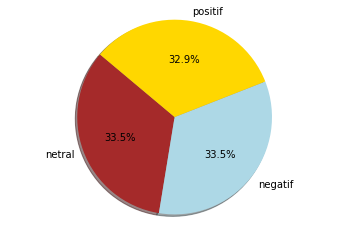

In [0]:
sizes =  sentimen1['sentimen'].value_counts()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [0]:
sentimen1 = sentimen1.sample(frac=1).reset_index(drop= True)  #untuk mengacak data dari concat yang urut
sentimen1.head()


,tweet,sentimen
0,"1. Setibanya di Kota Pekanbaru, Provinsi Riau,...",negatif
1,Sekalipun banyak berita miring tentang tanah m...,positif
2,Daerah yg cocok utk Ibukota baru RI adalah : K...,positif
3,Jokowi memberi arahan tegas kepada Panglima TN...,positif
4,Baca saja awal dr TL ini yg tuduh jokowi tebar...,netral


In [0]:
#untuk mengubah huruf menjadi huruf kecil semua
sentimen1['tweet'] = sentimen1['tweet'].str.lower() 
sentimen1.head()


,tweet,sentimen
0,"1. setibanya di kota pekanbaru, provinsi riau,...",negatif
1,sekalipun banyak berita miring tentang tanah m...,positif
2,daerah yg cocok utk ibukota baru ri adalah : k...,positif
3,jokowi memberi arahan tegas kepada panglima tn...,positif
4,baca saja awal dr tl ini yg tuduh jokowi tebar...,netral


In [0]:
def replace_ascii(data):
    data = html.unescape(data)
    return data
sentimen1['tweet'] = replace_ascii(sentimen1['tweet'])

# untuk menghapus apapun selain text 
sentimen1['tweet']=sentimen1['tweet'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
#step tokenize
sentimen1['tweet'] = sentimen1['tweet'].apply(nltk.word_tokenize)
token = sentimen1
token

,tweet,sentimen
0,"[setibanya, di, kota, pekanbaru, provinsi, ria...",negatif
1,"[sekalipun, banyak, berita, miring, tentang, t...",positif
2,"[daerah, yg, cocok, utk, ibukota, baru, ri, ad...",positif
3,"[jokowi, memberi, arahan, tegas, kepada, pangl...",positif
4,"[baca, saja, awal, dr, tl, ini, yg, tuduh, jok...",netral
...,...,...
11924,"[misal, kalo, ibukota, pindah, di, kalimantan,...",positif
11925,"[kalimantan, timur, terlalu, percaya, diri, un...",positif
11926,"[tinjau, penanganan, karhutla, jokowi, bertola...",netral
11927,"[lha, ini, krn, kurang, baca, pernah, baca, pr...",negatif


In [0]:
data = pd.read_csv('/content/sample_data/indonesian_stopword.txt')
data['\'\'']
sentimen1['tweet'] = sentimen1['tweet'].apply(lambda x: [y for y in x if y not in data['\'\''].tolist()])
stopword = sentimen1
stopword

,tweet,sentimen
0,"[kota, pekanbaru, provinsi, riau, malam, presi...",negatif
1,"[berita, miring, tanah, milik, swasta, orangny...",positif
2,"[daerah, cocok, utk, ibukota, ri, kalimantan, ...",positif
3,"[jokowi, arahan, panglima, tni, kapolri, terka...",positif
4,"[baca, dr, tl, tuduh, jokowi, tebar, hoax, krn...",netral
...,...,...
11924,"[kalo, ibukota, pindah, kalimantan, aman, satw...",positif
11925,"[kalimantan, percaya, dijadikan, ibukota, joko...",positif
11926,"[tinjau, penanganan, karhutla, jokowi, bertola...",netral
11927,"[lha, krn, baca, baca, prof, tamim, israel, pa...",negatif


In [0]:
stopwordsinggris = nltk.corpus.stopwords.words('english')
sentimen1['tweet']=sentimen1['tweet'].apply(lambda x: [y for y in x if y not in stopwordsinggris])
stopwords = sentimen1
stopwords

,tweet,sentimen
0,"[kota, pekanbaru, provinsi, riau, malam, presi...",negatif
1,"[berita, miring, tanah, milik, swasta, orangny...",positif
2,"[daerah, cocok, utk, ibukota, ri, kalimantan, ...",positif
3,"[jokowi, arahan, panglima, tni, kapolri, terka...",positif
4,"[baca, dr, tl, tuduh, jokowi, tebar, hoax, krn...",netral
...,...,...
11924,"[kalo, ibukota, pindah, kalimantan, aman, satw...",positif
11925,"[kalimantan, percaya, dijadikan, ibukota, joko...",positif
11926,"[tinjau, penanganan, karhutla, jokowi, bertola...",netral
11927,"[lha, krn, baca, baca, prof, tamim, israel, pa...",negatif


In [0]:
#untuk mengubah field sentimen menjadi angka untuk mempercepat proses
sentimen2 = sorted(sentimen1['sentimen'].unique())
sentiment_mapping = dict(zip(sentimen2, range(0, len(sentimen2) + 1)))
sentimen1['sentimen']  = sentimen1['sentimen'].map(sentiment_mapping).astype(int)
sentimen1_mapping = sentimen1
sentimen1_mapping


,tweet,sentimen
0,"[kota, pekanbaru, provinsi, riau, malam, presi...",0
1,"[berita, miring, tanah, milik, swasta, orangny...",2
2,"[daerah, cocok, utk, ibukota, ri, kalimantan, ...",2
3,"[jokowi, arahan, panglima, tni, kapolri, terka...",2
4,"[baca, dr, tl, tuduh, jokowi, tebar, hoax, krn...",1
...,...,...
11924,"[kalo, ibukota, pindah, kalimantan, aman, satw...",2
11925,"[kalimantan, percaya, dijadikan, ibukota, joko...",2
11926,"[tinjau, penanganan, karhutla, jokowi, bertola...",1
11927,"[lha, krn, baca, baca, prof, tamim, israel, pa...",0


In [0]:
sentimen1['tweet'] = sentimen1['tweet'].str.join(" ")
sentimen1.head()

,tweet,sentimen
0,kota pekanbaru provinsi riau malam presiden me...,0
1,berita miring tanah milik swasta orangnya joko...,2
2,daerah cocok utk ibukota ri kalimantan dgn kel...,2
3,jokowi arahan panglima tni kapolri terkait pen...,2
4,baca dr tl tuduh jokowi tebar hoax krn karhutl...,1


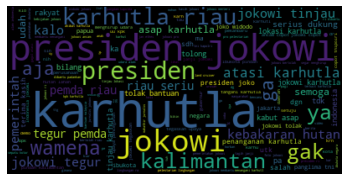

In [0]:
#wordcloud untuk mengetahui text apa saja yang sering keluar
text = sentimen1['tweet'].to_string()
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemming process
i=0
stm = sentimen1
sentimen1
import array

In [0]:
i=0
list1 = []
for index,row in stm.iterrows():
  i=i+1
  # print(i)
  # print(row['tweet'])
  res= stemmer.stem(row['tweet'])
  list1.append(res)
  # # print(res)
  # if i == 50 :
  #   break
# sentimen1['tweet'] = stemmer.stem(sentimen1['tweet'].to_string())
stm['tweet']=list1



In [0]:
for index,row in stm.iterrows():
  print(row['tweet'])

bosan karhutla tangkap level masyarakat kelas usaha santei ajee
jokowi habis jurus padam karhutla diriau pictwittercomgvsiurfih
terima kasih jokowi bantu tangan karhutla riau pictwittercomtwluvla tanggapbencanakarhutla
harap presiden jokowi tegur pemda riau serius dukung tangan karhutla
padam karhutla jokowi usaha sudahdilakukan pictwittercomxxiqkmkzle
bilang kelola hutan tindak korektif corrective action kalah karhutla jokowi patuh putus
ifakta presiden jokowi badan rencana bangun nasional skema biaya rencana pindah ibukota jokowi pindah kota kalimantan unjung lokasi calon ibukota negara pictwittercompzleua
haha mana aja partai ramai mati krn asap karhutla gak bikin video kayak gin kamerad pepet nih
jokowi presiden sesuai pasal ayat uud ya ukur presiden pulau jawa santai sepeda wamena duka jokowi publik
heli jokowi tinjau lokasi karhutla riau pictwittercomtgxxtfy
jambi karhutla parah
wag grup banyak pro jokowi mingkem mahasiswa wamena berisik melehoy gak manusia sedikit
medan yo iri m

In [0]:
sentimen1=stm
sentimen1.head(20)

,tweet,sentimen
0,bosan karhutla tangkap level masyarakat kelas ...,1
1,jokowi habis jurus padam karhutla diriau pictw...,1
2,terima kasih jokowi bantu tangan karhutla riau...,2
3,harap presiden jokowi tegur pemda riau serius ...,2
4,padam karhutla jokowi usaha sudahdilakukan pic...,1
5,bilang kelola hutan tindak korektif corrective...,0
6,ifakta presiden jokowi badan rencana bangun na...,2
7,haha mana aja partai ramai mati krn asap karhu...,0
8,jokowi presiden sesuai pasal ayat uud ya ukur ...,2
9,heli jokowi tinjau lokasi karhutla riau pictwi...,1


In [0]:
X = sentimen1['tweet']
y = sentimen1['sentimen']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state = 20,
                                                 test_size = 0.3)


In [0]:
print('The length of the trainning set are {}'.format(len(X_train)))
print('The length of the test set are {}'.format(len(X_test)))

The length of the trainning set are 8350
The length of the test set are 3579


In [0]:
X_train.head() #data sentimen
#y_train.head() #data tweet

NameError: ignored

In [0]:
#CountVectorizer just counts the word frequencies 
#With the TFIDFVectorizer the value increases proportionally to count,
#but is offset by the frequency of the word in the corpus.
#Here we use CountVectorizer
#ngram_range = (1,1) for one-word token,means only unigrams
#null accuracy: accuracy that could be achieved by always predicting the most frequent class

Lreg = LogisticRegression()
vectorizer = CountVectorizer(ngram_range = (1,1),
                             stop_words=None)
pipeline = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier',Lreg)
])


if len(X_test[y_test == 0])/(len(X_test)*1)>0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1)
else:
        
        null_accuracy = 1 - (len(X_test[y_test == 0]) / (len(X_test)*1))
        
sentiment_fit = pipeline.fit(X_train,y_train)
y_pred = sentiment_fit.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print("The null accuracy is {0:.4f}".format(null_accuracy))
print("The accuracy of the model is {0:.4f}".format(accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The null accuracy is 0.6700
The accuracy of the model is 0.8474


In [0]:
#CountVectorizer just counts the word frequencies 
#With the TFIDFVectorizer the value increases proportionally to count,
#but is offset by the frequency of the word in the corpus.
#Here we use CountVectorizer
#ngram_range = (1,1) for one-word token,means only unigrams
#null accuracy: accuracy that could be achieved by always predicting the most frequent class

Lreg = LogisticRegression()

tfidfmethod = TfidfVectorizer(ngram_range = (1,1),
                             stop_words=None)
pipeline1 = Pipeline([
    ('vectorizer',tfidfmethod),
    ('classifier',Lreg)
])


if len(X_test[y_test == 0])/(len(X_test)*1)>0.5:
        null_accuracy1 = len(X_test[y_test == 0]) / (len(X_test)*1)
else:
        
        null_accuracy1 = 1 - (len(X_test[y_test == 0]) / (len(X_test)*1))
        
sentiment_fit1 = pipeline1.fit(X_train,y_train)
y_pred1 = sentiment_fit.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred1)

print("The null accuracy is {0:.4f}".format(null_accuracy1))
print("The accuracy of the model is {0:.4f}".format(accuracy1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The null accuracy is 0.6700
The accuracy of the model is 0.8474


In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)


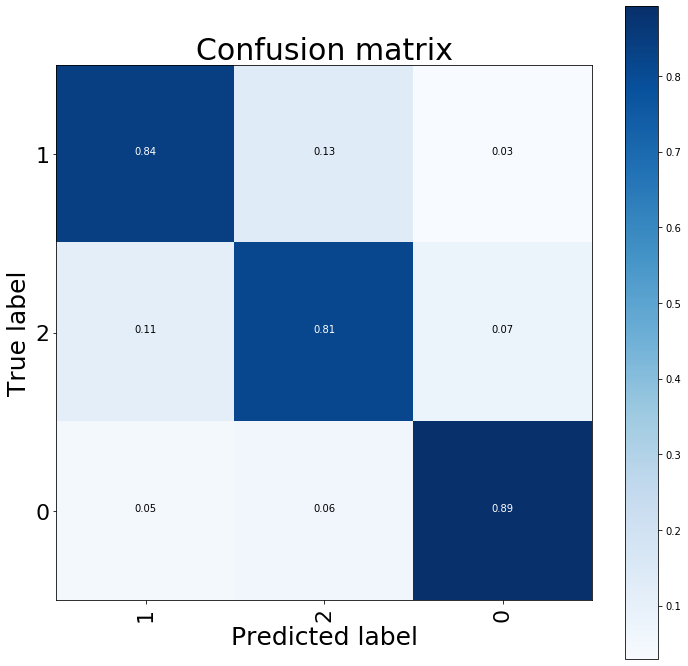

[[ 991  155   35]
 [ 137  978   90]
 [  58   71 1064]]
CPU times: user 350 ms, sys: 7 ms, total: 357 ms
Wall time: 363 ms


In [0]:
%%time

cnf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=sentimen1.sentimen.unique(), title="Confusion matrix")
plt.show()
print(cnf_matrix)

In [0]:
y_train.head()

281     2
7678    2
8034    2
3043    1
7534    0
Name: sentimen, dtype: int64

In [0]:
print(sentiment_fit)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
             

In [0]:
list2= ['Berikut perkembangan kebakaran hutan dan lahan (karhutla) tiap hari ya.. Keliatan kan ada progressnya?']
predict = sentiment_fit.predict(list2)
predict

array([1])

In [0]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred,average=None))

[0.84289277 0.79834711 0.88593482]


In [0]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred,average=None))

[0.83594394 0.81587838 0.87394247]


In [0]:
import pickle
filename = 'yeheyyy.sav'
pickle.dump(sentiment_fit, open(filename, 'wb'))

In [0]:
from sklearn.externals import joblib
filename = 'yuhu.sav'
joblib.dump(sentiment_fit, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['yuhu.sav']